START NOTEBOOK

## Set-up 

In [1]:
from hydroplots import *
from leach_hydrology import *
import numpy as np

import mpld3
mpld3.enable_notebook()

# Plot graphs within this document
%matplotlib inline

# Plot graphs outside (for interaction)
# %matplotlib

from pestmob import *
from mixinglayer import *

### Pesticide, soil type and runoff calibration parameter.  

In [2]:
# Soil and pesticide
pesticide = 'Metalaxyl'
initial_condition = 'mean'
soil_type = 'Vine Soil'
soil = 'Rouff'
soil_short = 'Vine'

pesti_obs = choose_pesticide(
    pesticide,
    soil)

# Kd ranges to test
Kd_pest_sterile = pesti_obs[0]
Kd_pest_living = pesti_obs[1]

# Initial concentrations and mass out observed
pest_dict_S_1st = pesti_obs[2]
pest_dict_L_1st = pesti_obs[3]
pest_dict_S_2nd = pesti_obs[4]
pest_dict_L_2nd = pesti_obs[5]

# Assumed (used to calculate Reynolds number)
runoff_vel = 10.0  # mm/min

### Microcosm

In [3]:
d = (14.93 * 2)  # Diameter of falcon tube (mm)
area = ((d / 2) ** 2) * 3.1416  # (mm2)
soil_height1 = 20  # Mixing layer depth in mm
soil_height2 = 20  # mm

### Soil hydrological characteristics

In [4]:
if soil == 'Alteck':
    kSat = 2.24  # mm/min (13.45 cm/h - Crop Soil) 
    psi = 1100  # soil suction Alteck (mm)
    eff_height = 0.80
elif soil == 'Rouff': 
    kSat = 17.62*10/60  # mm/min (17.62 cm/h - Vine Soil) 
    psi = 1100  # soil suction Alteck (mm)
    eff_height = 0.76
    
# Soil characteristics (Equivalent for Alteck and Rouffach)
# Initial bulk density options:
pb_i0 = 0.99/10**3  # bulk density (g/cm^3) -> g/mm^3  (M. Trautmann)
pb_i1 = 2.61/10**3 # inital 1st pulse, calc. from experiment cond.
pb_i2 = 3.59/10**3 # initial 2nd pulse, calc. from experiment cond.

# Final bulk density options (1st and 2nd pulses)
pb_f1 = 3.59/10**3 # final1, calculated from experimental conditions.
pb_f2 = 3.76/10**3 # final2, calculated from experimental conditions.

### Store results

In [5]:
output_hydro_params = {
    soil_short : [{'R1_FA':[],
              'R2_ALL':[],
              'Err1':[{'Fresh':[], 'Aged':[]}],
              'Err2':[{'SF':[], 'SA':[], 'LF':[], 'LA':[]}],
              'Ksat2':[{'SF':[], 'SA':[], 'LF':[], 'LA':[]}]
             }]
    }

In [6]:
output_pesti_params = {
    soil_short: {'R1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'R2': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Err1': {'SF': [], 'SA': [], 'LF': [], 'LA': [],
                          'SFmax': [], 'SAmax': [], 'LFmax': [], 'LAmax': [],
                          'SFmin': [], 'SAmin': [], 'LFmin': [], 'LAmin': []},
                 'Err2': {'SF': [], 'SA': [], 'LF': [], 'LA': [],
                          'SFmax': [], 'SAmax': [], 'LFmax': [], 'LAmax': [],
                          'SFmin': [], 'SAmin': [], 'LFmin': [], 'LAmin': []},
                 'Koc1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Koc2': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Kd1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Kd2': {'SF': None, 'SA': None, 'LF': None, 'LA': None}
                 }
}

## Hydrology - 1st pulse

#### Computation

In [7]:
water_data = leachsim(kSat = kSat,
                      soil_height=soil_height1,
                      eff_height=eff_height,
                      soil = 'Alteck',
                      psi=psi)

Mass balance True
Mass balance 0.0
Mass balance 0.0


In [8]:
water_eval = leachsim2(
    kSat = [kSat],
    soil_height=soil_height1,
    eff_height = eff_height,
    soil = 'Alteck',
    isAGED = False,
    isFirstCycle=True 
)

output_hydro_params = extract_goodness(
    water_eval,
    output_hydro_params,
    soil_short,
    isFirstCycle = True,
    isAGED = False)


FRESH
--------------------------------------------
ksat high:  17.62 cm/h
ksat med12:  17.62 cm/h
ksat med30:  17.62 cm/h
ksat low:  17.62 cm/h
--------------------------------------------
R2:  0.971670449532
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -1.6576800421
55 mm/h - 12min  55.7145290413
55 mm/h - 30min  4.54963224758
30 mm/h - 30min  1.17824563313
--------------------------------------------
Mass balance:  True True True True


In [9]:
water_eval = leachsim2(
    kSat = [kSat],
    soil_height=soil_height1,
    eff_height = eff_height,
    soil = 'Alteck',
    isAGED = True,
    isFirstCycle=True 
)

output_hydro_params = extract_goodness(
    water_eval,
    output_hydro_params,
    soil_short,
    isFirstCycle = True,
    isAGED = True)

AGED
--------------------------------------------
ksat high:  17.62 cm/h
ksat med12:  17.62 cm/h
ksat med30:  17.62 cm/h
ksat low:  17.62 cm/h
--------------------------------------------
R2:  0.989501541182
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -9.94976957607
55 mm/h - 12min  -3.83662745901
55 mm/h - 30min  -0.191716281473
30 mm/h - 30min  -10.6817509472
--------------------------------------------
Mass balance:  True True True True


In [10]:
title = "Percolated Volume [mL] - " + str(soil_type) + "1st Pulse"

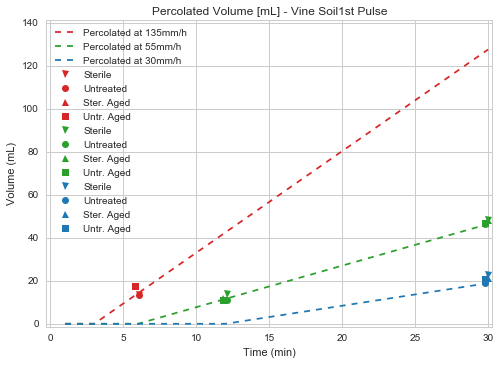

In [11]:
extract_and_plothydro(
    water_data,
    "Percolated at 135mm/h", "Percolated at 55mm/h", "Percolated at 30mm/h", "NA",
    title,
    soil,
    isFirstCycle = True,
    isPercolation = True
)

In [12]:
hydro1 = extract(
    water_data, 
    isFirstCycle = True
)

percol_data1 = hydro1[0]
runoff_data1 = hydro1[1]
time_sizes1 = hydro1[2]

## Transport - 1st pulse

### Computation transport - 1st pulse

#### Test factor X (Sterile)

In [13]:
x = 2

In [14]:
pest_sterile_1st = pest_linear_x(
    Kd_pest_sterile,
    x,
    initial_condition,
    pest_dict_S_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_pest(
        pest_sterile_1st,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = True)

1st Pulse
Sterile Vine
--------------------------------------------
Koc tested:  [100.  75.  50.  30.  28.  25.  17.  15.  14.]
Best Kd (Fresh):  1.53555 cm3/g ( Num:  2 ) 
 x factor:  2 
 R2:  -0.845355278775 
 Effective Koc (fresh) - [cm3/g]: 37.5
--------------------------------------------
Best Kd (Aged):  0.51185 cm3/g ( Num:  6 ) 
 x factor: No factor considered.  
 R2:  0.273764421922 
 Effective Koc (aged) [cm3/g]: 25.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -45.6289893856 | 166.919002586 | 307.0
(A) 135 mm/h - Aged  -19.8173857823 | 216.092145317 | 269.5
(B) 55 mm/h - Fresh  -23.7963996561 | 212.76045216 | 279.2
(B) 55 mm/h - Aged  -9.91789304132 | 265.652133421 | 294.9
(C) 55 mm/h - Fresh  16.1444174675 | 364.461182013 | 313.8
(C) 55 mm/h - Aged  -28.6676058421 | 377.919024249 | 529.8
(D)

#### Test factor X (Living)

In [15]:
x = 2

In [16]:
pest_living_1st = pest_linear_x(
    Kd_pest_living,
    x,
    initial_condition,
    pest_dict_L_1st,          
    pb_i1, pb_f1,
    percol_data1, percol_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    KFILM = True,
    isFirstCycle = True,
    isLiving = True)


output_pesti_params = extract_goodness_pest(
        pest_living_1st,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = True)

1st Pulse
Living Vine
--------------------------------------------
Koc tested:  [ 100.   75.   50.   30.   28.   25.   17.   15.   14.]
Best Kd (Fresh):  0.8497 cm3/g ( Num:  3 ) 
 x factor:  2 
 R2:  0.699284484541 
 Effective Koc (fresh) - [cm3/g]: 25.0
--------------------------------------------
Best Kd (Aged):  0.50982 cm3/g ( Num:  4 ) 
 x factor: No factor considered.  
 R2:  0.215406047979 
 Effective Koc (aged) [cm3/g]: 30.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  17.7265883796 | 319.392234274 | 271.3
(A) 135 mm/h - Aged  107.91950319 | 243.05789923 | 116.9
(B) 55 mm/h - Fresh  25.3870146363 | 381.552685538 | 304.3
(B) 55 mm/h - Aged  6.66603824526 | 295.358259901 | 276.9
(C) 55 mm/h - Fresh  -18.3743871597 | 503.140277547 | 616.4
(C) 55 mm/h - Aged  1.57877657004 | 415.558774948 | 409.1
(D

#### Time series

In [17]:
data_stack = pest_sterile_1st['Data_stack']
sterile1 = extract_pest(data_stack)

mass_percol_sterile1 = sterile1[0]
mass_pond_sterile1 = sterile1[1]

In [18]:
data_stack = pest_living_1st['Data_stack']
living1 = extract_pest(data_stack)

mass_percol_living1 = living1[0]
mass_pond_living1 = living1[1]

## Plotting transport

### Sterile (1st Pulse, Crop Soil)

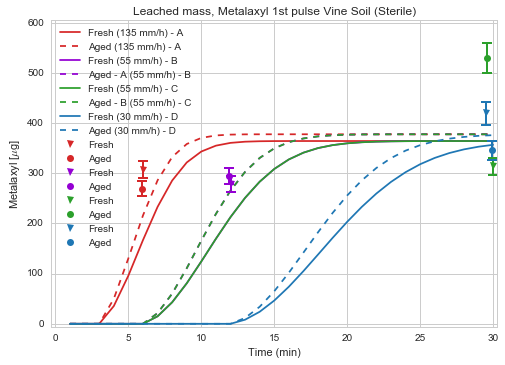

In [19]:
pestiplot_condition(
    mass_percol_sterile1,
    pest_dict_S_1st,
    pesticide,
    soil_type,
    cycle = '1st pulse',
    LEACH = True,
    STERILE = True
)

### Living (1st Pulse, Crop Soil)

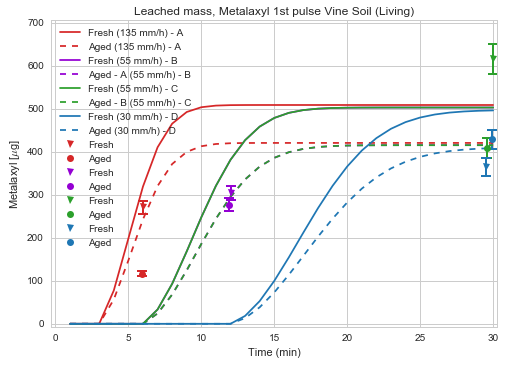

In [20]:
pestiplot_condition(
    mass_percol_living1,
    pest_dict_L_1st,
    pesticide,
    soil_type,
    cycle = '1st pulse',
    LEACH = True,
    STERILE = False
)

# Hydrology - 2nd pulse

### Inverse Ksat determination 

Based on hisotric rainfall pattern, fresh and aged.

In [21]:
water2_ktest = leachsim3(
    soil,
    kSat = [ kSat/5, kSat/10, kSat/15,
        kSat/25, kSat/50,  kSat/75, 
        kSat/100, kSat/125, kSat/150, 
        kSat/175, kSat/200, kSat/250,
        kSat/350, kSat/500, kSat/700, kSat/1000],
    soil_height=soil_height2,
    isFirstCycle = False
)

output_hydro_params = extract_goodness(
    water2_ktest,
    output_hydro_params,
    soil_short,
    isFirstCycle = False,
    isAGED = None
)

R2:  0.984388324547
--------------------------------------------
Sterile, Fresh Soil
ksat high:  0.35240000000000005 cm/h | Error % -12.5148211298
ksat med12:  0.01762 cm/h | Error % 128.69226691
ksat med30:  0.01762 cm/h | Error % 363.760286176
ksat low:  0.07048 cm/h | Error % 4.76959385113
--------------------------------------------
Sterile, Aged Soil
ksat high:  0.14096 cm/h | Error % -0.626720468252
ksat med12:  0.35240000000000005 cm/h | Error % -0.702170472638
ksat med30:  1.1746666666666667 cm/h | Error % -5.73433335983
ksat low:  0.7048000000000001 cm/h | Error % 9.70860633442
--------------------------------------------
Living, Fresh Soil
ksat high:  0.01762 cm/h | Error % inf
ksat med12:  0.03524 cm/h | Error % 3.53388184937
ksat med30:  0.17620000000000002 cm/h | Error % 2.28902480468
ksat low:  0.35240000000000005 cm/h | Error % -9.70964935858
--------------------------------------------
Living, Fresh Aged
ksat high:  0.11746666666666668 cm/h | Error % 2.32506552889
ksat 

### Percolation - 2nd pulse

In [22]:
title = "Percolated Volume [mL] - " + str(soil_type) +  " 2nd Pulse"

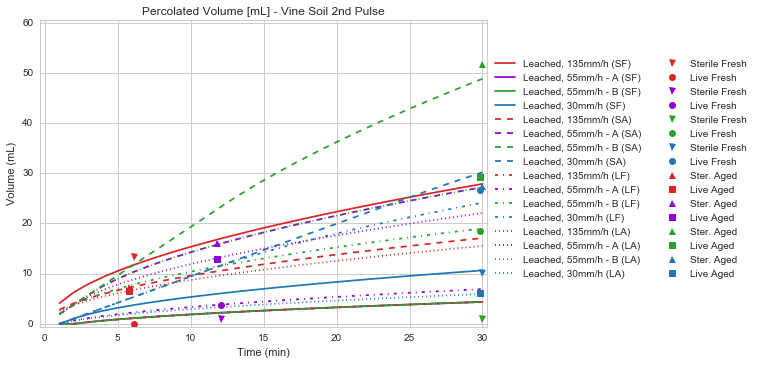

In [23]:
extract_and_plothydro(
    water2_ktest,
    "Leached, 135mm/h", "Leached, 55mm/h - A", "Leached, 55mm/h - B", "Leached, 30mm/h",
    title,
    soil,
    isFirstCycle = False,
    isPercolation = True
)

### Ponding - 2nd pulse

In [24]:
title = "Ponded Volume [mL] [mL] - " + str(soil_type) +  " 2nd Pulse"

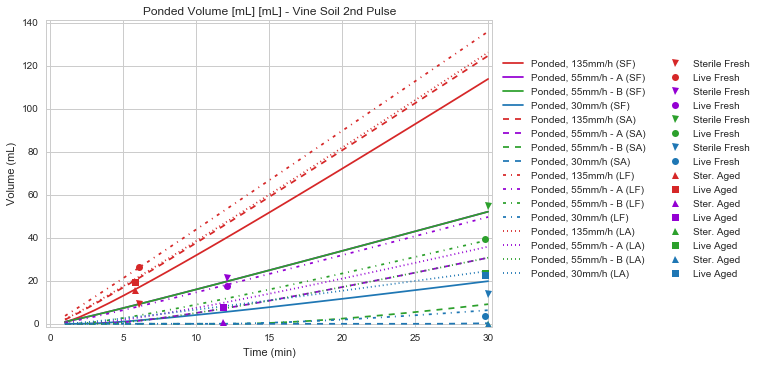

In [25]:
extract_and_plothydro(
    water2_ktest,
    "Ponded, 135mm/h", "Ponded, 55mm/h - A", "Ponded, 55mm/h - B", "Ponded, 30mm/h",
    title,
    soil,
    isFirstCycle = False,
    isPercolation = False
)

In [26]:
hydro2 = extract(
    water2_ktest,
    isFirstCycle = False
)
percol_data2 = hydro2[0]
runoff_data2 = hydro2[1]
time_sizes2 = hydro2[2]

## Transport - 2nd pulse

### Computation transport - 2nd Pulse

#### Kd optimal (sterile)

In [27]:
x = 2

In [28]:
pest_sterile_2nd = pest_linear_x(
    Kd_pest_sterile,
    x,
    initial_condition,
    pest_dict_S_2nd,
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2,
    d, runoff_vel,
    soil = "Alteck",
    isFirstCycle = False,
    isLiving = False)

output_pesti_params = extract_goodness_pest(
        pest_sterile_2nd,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = False)

2nd Pulse
Sterile Crop
--------------------------------------------
Koc tested:  [ 91.21447028  68.41085271  45.60723514  27.36434109  25.54005168
  22.80361757  15.50645995  13.68217054  12.77002584]
Best Kd (Fresh):  2.0474 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  0.849617598561 
 Effective Koc (fresh) - [cm3/g]: 45.6072351421
--------------------------------------------
Best Kd (Aged):  0.61422 cm3/g ( Num:  4 ) 
 x factor: No factor considered.  
 R2:  0.615756400584 
 Effective Koc (aged) [cm3/g]: 27.3643410853
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  86.9514616754 | 119.275032549 | 63.8
(A) 135 mm/h - Aged  21.2309804173 | 121.715904339 | 100.4
(B) 55 mm/h - Fresh  No obs | 40.994363367 | nan
(B) 55 mm/h - Aged  46.3169533543 | 208.209024623 | 142.3
(C) 55 mm/h - Fresh  No obs | 136.555012108 | 

#### Kd optimal (living)

In [29]:
x = 2

In [30]:
pest_living_2nd = pest_linear_x(
    Kd_pest_living,
    x,
    initial_condition,
    pest_dict_L_2nd,          
    pb_i1, pb_f1,
    percol_data2, runoff_data2,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil = "Alteck",
    KFILM = True,
    isFirstCycle = False,
    isLiving = True)

output_pesti_params = extract_goodness_pest(
        pest_living_2nd,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = False)

2nd Pulse
Living Crop
--------------------------------------------
Koc tested:  [ 53.17604356  39.88203267  26.58802178  15.95281307  14.8892922
  13.29401089   9.0399274    7.97640653   7.4446461 ]
Best Kd (Fresh):  1.27455 cm3/g ( Num:  2 ) 
 x factor:  2 
 R2:  0.999943763609 
 Effective Koc (fresh) - [cm3/g]: 19.9410163339
--------------------------------------------
Best Kd (Aged):  1.6994 cm3/g ( Num:  1 ) 
 x factor: No factor considered.  
 R2:  0.680098217951 
 Effective Koc (aged) [cm3/g]: 53.1760435572
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  No obs | 17.6289339806 | nan
(A) 135 mm/h - Aged  -62.381864577 | 31.4863793491 | 83.7
(B) 55 mm/h - Fresh  No obs | 117.501858414 | nan
(B) 55 mm/h - Aged  -39.2153211597 | 70.1455193817 | 115.4
(C) 55 mm/h - Fresh  No obs | 193.159721216 | nan
(C) 5

#### Time series

In [31]:
data_stack = pest_sterile_2nd['Data_stack']
sterile2 = extract_pest(data_stack)

data_stack = pest_living_2nd['Data_stack']
living2 = extract_pest(data_stack)

mass_percol_sterile2 = sterile2[0]
mass_pond_sterile2 = sterile2[1]

mass_percol_living2 = living2[0]
mass_pond_living2 = living2[1]

## Plotting transport 

### Sterile (2nd Pulse)

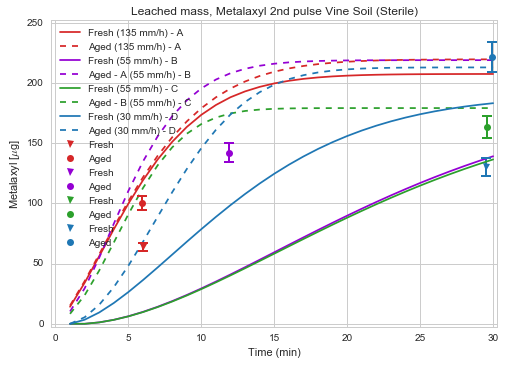

In [32]:
pestiplot_condition(
    mass_percol_sterile2,
    pest_dict_S_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = True
)

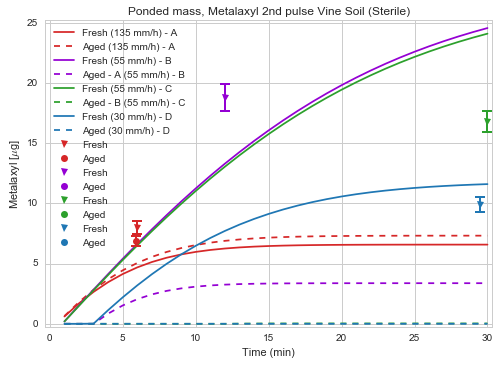

In [33]:
pestiplot_condition(
    mass_pond_sterile2,
    pest_dict_S_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = True
)

### Living (2nd Pulse)

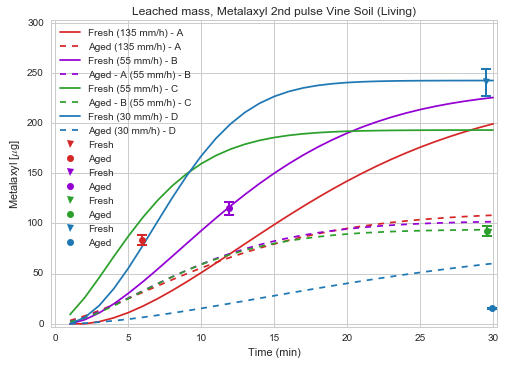

In [34]:
pestiplot_condition(
    mass_percol_living2,
    pest_dict_L_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = False
)

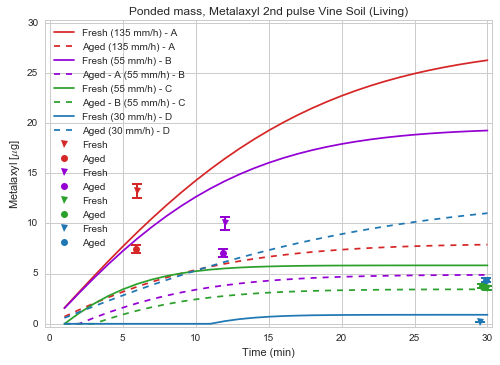

In [35]:
pestiplot_condition(
    mass_pond_living2,
    pest_dict_L_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = False
)

In [36]:
import pprint

In [37]:
pprint.pprint(output_hydro_params)

{'Vine': [{'Err1': [{'Aged': [-9.9497695760673803,
                              -3.8366274590119529,
                              -0.19171628147268441,
                              -10.681750947175953],
                     'Fresh': [-1.6576800420983793,
                               55.714529041314499,
                               4.5496322475756381,
                               1.1782456331323563]}],
           'Err2': [{'LA': [2.3250655288884485,
                            1.775964240154662,
                            -6.8151479703231335,
                            -4.0853015171098992],
                     'LF': [inf,
                            3.5338818493703803,
                            2.2890248046824371,
                            -9.7096493585817267],
                     'SA': [-0.62672046825181538,
                            -0.70217047263768517,
                            -5.7343333598281507,
                            9.7086063344151547],
               

END NOTEBOOK

### Max values

In [38]:
initial_condition = 'max'

#### 1st Pulse

In [39]:
Kd1_SF = output_pesti_params[soil_short]['Kd1']['SF']*10**3
Kd1_SA = output_pesti_params[soil_short]['Kd1']['SA']*10**3
Kd1_choice_sterile = [Kd1_SF, Kd1_SA]

Kd1_LF = output_pesti_params[soil_short]['Kd1']['LF']*10**3
Kd1_LA = output_pesti_params[soil_short]['Kd1']['LA']*10**3
Kd1_choice_living = [Kd1_LF, Kd1_LA]

In [40]:
max_sterile_1st = pest_Kd_choice(
    Kd1_choice_sterile,
    x,
    initial_condition,
    pest_dict_S_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_maxmin(
        max_sterile_1st,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = True)


1st Pulse
Sterile Vine
--------------------------------------------
Koc tested:  [ 75.  25.]
Best Kd (Fresh):  1.53555 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -0.854425466109 
 Effective Koc (fresh) - [cm3/g]: 37.5
--------------------------------------------
Best Kd (Aged):  0.51185 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  0.333919734388 
 Effective Koc (aged) [cm3/g]: 25.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -17.5300542361 | 253.182733495 | 307.0
(A) 135 mm/h - Aged  4.80844932835 | 282.45877094 | 269.5
(B) 55 mm/h - Fresh  -0.851002718986 | 276.824000409 | 279.2
(B) 55 mm/h - Aged  17.7482928773 | 347.239715695 | 294.9
(C) 55 mm/h - Fresh  51.1162527717 | 474.202801198 | 313.8
(C) 55 mm/h - Aged  -6.7598669423 | 493.98622494 | 529.8
(D) 30 mm/h - Fresh  10.7299640374 | 462.

In [41]:
max_living_1st = pest_Kd_choice(
    Kd1_choice_living,
    x,
    initial_condition,
    pest_dict_L_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_maxmin(
        max_living_1st,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = True)

1st Pulse
Sterile Vine
--------------------------------------------
Koc tested:  [ 41.50141643  24.90084986]
Best Kd (Fresh):  0.8497 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -0.373857118377 
 Effective Koc (fresh) - [cm3/g]: 20.7507082153
--------------------------------------------
Best Kd (Aged):  0.50982 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  -3.45553185828 
 Effective Koc (aged) [cm3/g]: 24.9008498584
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  68.2930709103 | 456.57910138 | 271.3
(A) 135 mm/h - Aged  174.703531841 | 321.128428723 | 116.9
(B) 55 mm/h - Fresh  67.1347514935 | 508.591048795 | 304.3
(B) 55 mm/h - Aged  42.5173538957 | 394.630552937 | 276.9
(C) 55 mm/h - Fresh  9.64268368558 | 675.837502238 | 616.4
(C) 55 mm/h - Aged  37.0144555819 | 560.526137786 | 409.1
(D) 30 mm/

#### 2ndPulse Pulse

In [42]:
Kd2_SF = output_pesti_params[soil_short]['Kd2']['SF']*10**3
Kd2_SA = output_pesti_params[soil_short]['Kd2']['SA']*10**3
Kd2_choice_sterile = [Kd2_SF, Kd2_SA]

Kd2_LF = output_pesti_params[soil_short]['Kd2']['LF']*10**3
Kd2_LA = output_pesti_params[soil_short]['Kd2']['LA']*10**3
Kd2_choice_living = [Kd2_LF, Kd2_LA]

In [43]:
max_sterile_2nd = pest_Kd_choice(
    Kd2_choice_sterile,
    x,
    initial_condition,
    pest_dict_S_2nd,          
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2, 
    d, runoff_vel,
    soil,
    isFirstCycle = False,
    isLiving = False)

output_pesti_params = extract_goodness_maxmin(
        max_sterile_2nd,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = False)

2nd Pulse
Sterile Vine
--------------------------------------------
Koc tested:  [100.  30.]
Best Kd (Fresh):  2.0474 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  0.481536154939 
 Effective Koc (fresh) - [cm3/g]: 50.0
--------------------------------------------
Best Kd (Aged):  0.61422 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  -1.65670056462 
 Effective Koc (aged) [cm3/g]: 30.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  142.210560504 | 154.530337601 | 63.8
(A) 135 mm/h - Aged  61.9223608184 | 162.570050262 | 100.4
(B) 55 mm/h - Fresh  No obs | 52.8294866534 | nan
(B) 55 mm/h - Aged  94.9501514678 | 277.414065539 | 142.3
(C) 55 mm/h - Fresh  No obs | 175.21166447 | nan
(C) 55 mm/h - Aged  57.7660855734 | 290.880833574 | 163.8
(D) 30 mm/h - Fresh  83.9085650597 | 266.098796381 | 130.5
(D) 3

In [44]:
max_living_2nd = pest_Kd_choice(
    Kd2_choice_living,
    x,
    initial_condition,
    pest_dict_L_2nd,          
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2, 
    d, runoff_vel,
    soil,
    isFirstCycle = False,
    isLiving = True)

output_pesti_params = extract_goodness_maxmin(
        max_living_2nd,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = False)

2nd Pulse
Living Vine
--------------------------------------------
Koc tested:  [  75.  100.]
Best Kd (Fresh):  1.27455 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  0.822046420643 
 Effective Koc (fresh) - [cm3/g]: 37.5
--------------------------------------------
Best Kd (Aged):  1.6994 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  0.622698165298 
 Effective Koc (aged) [cm3/g]: 100.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  No obs | 23.5581432641 | nan
(A) 135 mm/h - Aged  -53.9161982838 | 38.5721420365 | 83.7
(B) 55 mm/h - Fresh  No obs | 154.64386659 | nan
(B) 55 mm/h - Aged  -22.3709471846 | 89.583926949 | 115.4
(C) 55 mm/h - Fresh  No obs | 280.591156595 | nan
(C) 55 mm/h - Aged  36.3494521315 | 131.795653861 | 92.4
(D) 30 mm/h - Fresh  35.8519397915 | 258.657801247 | 241.0
(D) 30 mm/h 

### Min values

In [45]:
initial_condition = 'min'

#### 1st Pulse

In [46]:
min_sterile_1st = pest_Kd_choice(
    Kd1_choice_sterile,
    x,
    initial_condition,
    pest_dict_S_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_maxmin(
        min_sterile_1st,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = True)

1st Pulse
Sterile Vine
--------------------------------------------
Koc tested:  [ 75.  25.]
Best Kd (Fresh):  1.53555 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  -3.75730736052 
 Effective Koc (fresh) - [cm3/g]: 37.5
--------------------------------------------
Best Kd (Aged):  0.51185 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  -1.77409876306 
 Effective Koc (aged) [cm3/g]: 25.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -55.7010028654 | 135.997921203 | 307.0
(A) 135 mm/h - Aged  -44.4432208929 | 149.725519694 | 269.5
(B) 55 mm/h - Fresh  -46.7417965931 | 148.696903912 | 279.2
(B) 55 mm/h - Aged  -37.5840789599 | 184.064551147 | 294.9
(C) 55 mm/h - Fresh  -18.8274178367 | 254.719562828 | 313.8
(C) 55 mm/h - Aged  -50.5753447418 | 261.851823558 | 529.8
(D) 30 mm/h - Fresh  -40.5210429791 |

In [47]:
min_living_1st = pest_Kd_choice(
    Kd1_choice_living,
    x,
    initial_condition,
    pest_dict_L_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_maxmin(
        min_living_1st,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = True)

1st Pulse
Sterile Vine
--------------------------------------------
Koc tested:  [ 41.50141643  24.90084986]
Best Kd (Fresh):  0.8497 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  0.456365871486 
 Effective Koc (fresh) - [cm3/g]: 20.7507082153
--------------------------------------------
Best Kd (Aged):  0.50982 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  -0.835746696641 
 Effective Koc (aged) [cm3/g]: 24.9008498584
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -11.0397314786 | 241.349208498 | 271.3
(A) 135 mm/h - Aged  44.4245978824 | 168.832354925 | 116.9
(B) 55 mm/h - Fresh  -11.6520229164 | 268.842894265 | 304.3
(B) 55 mm/h - Aged  -25.0719079232 | 207.475886961 | 276.9
(C) 55 mm/h - Fresh  -42.042518273 | 357.249917365 | 616.4
(C) 55 mm/h - Aged  -27.9650410068 | 294.695017241 | 409.1
(D) 3

#### 2nd Pulse

In [48]:
min_sterile_2nd = pest_Kd_choice(
    Kd2_choice_sterile,
    x,
    initial_condition,
    pest_dict_S_2nd,          
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2, 
    d, runoff_vel,
    soil,
    isFirstCycle = False,
    isLiving = False)

output_pesti_params = extract_goodness_maxmin(
        min_sterile_2nd,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = False)

2nd Pulse
Sterile Vine
--------------------------------------------
Koc tested:  [100.  30.]
Best Kd (Fresh):  2.0474 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  0.965424186785 
 Effective Koc (fresh) - [cm3/g]: 50.0
--------------------------------------------
Best Kd (Aged):  0.61422 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  -0.867988565548 
 Effective Koc (aged) [cm3/g]: 30.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  2.26906958918 | 65.2476663979 | 63.8
(A) 135 mm/h - Aged  -35.9946854676 | 64.2613357906 | 100.4
(B) 55 mm/h - Fresh  No obs | 22.6716977589 | nan
(B) 55 mm/h - Aged  -24.9999096151 | 106.725128618 | 142.3
(C) 55 mm/h - Fresh  No obs | 73.5990291716 | nan
(C) 55 mm/h - Aged  -56.315210873 | 111.905985428 | 163.8
(D) 30 mm/h - Fresh  -28.1186852729 | 112.355449193 | 130.5


In [49]:
min_living_2nd = pest_Kd_choice(
    Kd2_choice_living,
    x,
    initial_condition,
    pest_dict_L_2nd,          
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2, 
    d, runoff_vel,
    soil,
    isFirstCycle = False,
    isLiving = True)

output_pesti_params = extract_goodness_maxmin(
        min_living_2nd,
        initial_condition,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = False)

2nd Pulse
Living Vine
--------------------------------------------
Koc tested:  [  75.  100.]
Best Kd (Fresh):  1.27455 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  0.666060602175 
 Effective Koc (fresh) - [cm3/g]: 37.5
--------------------------------------------
Best Kd (Aged):  1.6994 cm3/g ( Num:  2 ) 
 x factor: No factor considered.  
 R2:  0.377771273493 
 Effective Koc (aged) [cm3/g]: 100.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  No obs | 9.58951435622 | nan
(A) 135 mm/h - Aged  -79.2670959288 | 17.3534407076 | 83.7
(B) 55 mm/h - Fresh  No obs | 61.242174477 | nan
(B) 55 mm/h - Aged  -69.0024817593 | 35.7711360498 | 115.4
(C) 55 mm/h - Fresh  No obs | 76.7192714603 | nan
(C) 55 mm/h - Aged  -52.0222172914 | 52.6264077228 | 92.4
(D) 30 mm/h - Fresh  -49.1126224184 | 105.288548023 | 241.0
(D) 30 mm

### Summary tables

0. High rainfall intensity (135 mm/h) at 6 min.
1. Medium rainfall intensity (55 mm/h) at 12 min.
2. Medium rainfall intensity (55 mm/h) at 30 min.
3. Low rainfall intensity (30 mm/h) at 30 min.

    a) LA : Living Aged

    b) LF : Living Fresh

    c) SA : Sterile Aged

    d) SF : Sterile Fresh
    
   
To compute max and min simualtions, the optimal Kd values obtained from the mean scenario were used. That is, the model has not been fitted to consider these extreme uncertainty scenarios.

- max: initial calculated concentration + measurement error

- min: initial calculated concentraion - measurement error

 

In [50]:
import pandas as pd

In [51]:
pd.DataFrame.from_dict(output_pesti_params[soil_short]['Err1'], orient='columns')

,LA,LAmax,LAmin,LF,LFmax,LFmin,SA,SAmax,SAmin,SF,SFmax,SFmin
0,107.919503,174.703532,44.424598,17.726588,68.293071,-11.039731,-19.817386,4.808449,-44.443221,-45.628989,-17.530054,-55.701003
1,6.666038,42.517354,-25.071908,25.387015,67.134751,-11.652023,-9.917893,17.748293,-37.584079,-23.796400,-0.851003,-46.741797
2,1.578777,37.014456,-27.965041,-18.374387,9.642684,-42.042518,-28.667606,-6.759867,-50.575345,16.144417,51.116253,-18.827418
3,-4.834715,29.910160,-31.700104,36.006619,84.777633,-2.325938,8.686224,42.066142,-24.693693,-14.895539,10.729964,-40.521043


In [52]:
pd.DataFrame.from_dict(output_pesti_params[soil_short]['Err2'], orient='columns')

,LA,LAmax,LAmin,LF,LFmax,LFmin,SA,SAmax,SAmin,SF,SFmax,SFmin
0,-62.381865,-53.916198,-79.267096,No obs,No obs,No obs,21.230980,61.922361,-35.994685,86.9515,142.211,2.26907
1,-39.215321,-22.370947,-69.002482,No obs,No obs,No obs,46.316953,94.950151,-24.999910,No obs,No obs,No obs
2,1.536864,36.349452,-52.022217,No obs,No obs,No obs,9.425449,57.766086,-56.315211,No obs,No obs,No obs
3,293.105106,422.270144,79.665406,0.637335,35.8519,-49.1126,-4.044146,29.564560,-52.910503,40.4617,83.9086,-28.1187
